## Google Reviews por Estado 
En este notebook modelamos la data disponible de la plataforma de Google Maps, sus metadata-sitios y reviews  para solo quedarnos con los datos de interés para nuestro cliente:<br>
* Category = 'Convenience store'<br>
* Le agregamos información a las reviews asociandolas a un business_name, y una categoria atraves de gmap_id.
* Adicionalmente, traemos para ese sitio la Ciudad y Estado

### Importamos las librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import re
import os
from datetime import datetime

## 0.1 Reviews por Estado
Leemos todos los reviews (.json) por estado consolidandolos en un único dataframe por estado.

In [3]:
directorio = "../../data/Google Maps/reviews-estados"
output_directory = "../../data/Google Maps/state_parquet"

# Iterate over each folder in the base directory
for folder_name in os.listdir(directorio):
    # Construct the full path to the folder
    folder_path = os.path.join(directorio, folder_name)

    # Check if the item in the base directory is a folder
    if os.path.isdir(folder_path):
        # List to store the individual DataFrames
        dfs = []

        # Iterate over each file in the folder
        for filename in os.listdir(folder_path):
            if filename.endswith(".json"):
                filepath = os.path.join(folder_path, filename)

                # Read the JSON file into a DataFrame
                df = pd.read_json(filepath, lines=True)

                # Add the DataFrame to the list
                dfs.append(df)

        # Concatenate all DataFrames into one
        df_combined = pd.concat(dfs, ignore_index=True)

        # Define the output file path
        output_file_path = os.path.join(output_directory, f"df_{folder_name}.parquet")

        # Store the DataFrame as a Parquet file
        df_combined.to_parquet(output_file_path, index=False)

        # Print a message confirming the storage location
        print(
            f"The combined DataFrame for {folder_name} was saved in {output_file_path}"
         )

The combined DataFrame for review-Alabama was saved in ../../data/Google Maps/state_parquet\df_review-Alabama.parquet
The combined DataFrame for review-Alaska was saved in ../../data/Google Maps/state_parquet\df_review-Alaska.parquet
The combined DataFrame for review-Arizona was saved in ../../data/Google Maps/state_parquet\df_review-Arizona.parquet
The combined DataFrame for review-Arkansas was saved in ../../data/Google Maps/state_parquet\df_review-Arkansas.parquet
The combined DataFrame for review-California was saved in ../../data/Google Maps/state_parquet\df_review-California.parquet
The combined DataFrame for review-Colorado was saved in ../../data/Google Maps/state_parquet\df_review-Colorado.parquet
The combined DataFrame for review-Connecticut was saved in ../../data/Google Maps/state_parquet\df_review-Connecticut.parquet
The combined DataFrame for review-Delaware was saved in ../../data/Google Maps/state_parquet\df_review-Delaware.parquet
The combined DataFrame for review-Dist

# 02. Filtramos cada Dataframe por Estado por la categoria de Interés
Filtramos cada uno de los Dataframes de Reviews por Estado para consolidar por la información de interés, categoria = 'Convenience store'<br>

In [7]:
import os
import pandas as pd

# Path to the directory containing the dataframes
input_directory = "../../data/Google Maps/state_parquet"
output_directory = "../../data/Google Maps/filtered_df"

sitios_metadata = "../../data/Google Maps/filtered_df/df_convenience_clean.parquet"

df_sitios = pd.read_parquet(sitios_metadata)

# Iterate over each file in the input directory
for filename in os.listdir(input_directory):

    # Check if the file is a Parquet file
    if filename.endswith(".parquet"):
        # Read the DataFrame from the Parquet file
        df = pd.read_parquet(os.path.join(input_directory, filename))
        
        # Function to convert None values to 'No' and other values to 'Yes'
        def replace_none(value):
            if value is None:
                return "No"
            else:
                return "Yes"
        # Perform information of each dataframe
        # Drop columns pics and resp
        df["resp"] = df["resp"].apply(replace_none)
        
        df.drop(["pics"], axis=1, inplace=True)
        
        # Eliminate duplicate records
        df.drop_duplicates(inplace=True)

        # Merge dfreviews Google1 and df_sitios based on the 'gmap_id' column
        df = df.merge(
            df_sitios[["gmap_id", "name", "category", "city", "state_us"]],
            on="gmap_id",
            how="left",
        )

        # Rename the 'name_y' column from df_sitios to 'business_name' in the merged DataFrame
        df.rename(columns={"name_y": "business_name", "name_x": "name"}, inplace=True)

        # Drop rows with NaN values in 'business_name', 'City', and 'State' columns
        df = df.dropna(subset=["business_name", "city"])

        # Extract the state name from the filename
        state_name = filename.split("-")[-1].split(".")[0]

        # Add a new column 'State_review' with the state name to the DataFrame
        df["State_review"] = state_name

        # Store the transformed DataFrame in the output directory
        output_file_path = os.path.join(output_directory, filename)
        df.to_parquet(output_file_path, index=False)

        # Print a message confirming the storage location
        print(
            f"The transformed DataFrame for {filename} was saved in {output_file_path}"
        )

The transformed DataFrame for df_review-Alabama.parquet was saved in ../../data/Google Maps/filtered_df\df_review-Alabama.parquet
The transformed DataFrame for df_review-Alaska.parquet was saved in ../../data/Google Maps/filtered_df\df_review-Alaska.parquet
The transformed DataFrame for df_review-Arizona.parquet was saved in ../../data/Google Maps/filtered_df\df_review-Arizona.parquet
The transformed DataFrame for df_review-Arkansas.parquet was saved in ../../data/Google Maps/filtered_df\df_review-Arkansas.parquet
The transformed DataFrame for df_review-California.parquet was saved in ../../data/Google Maps/filtered_df\df_review-California.parquet
The transformed DataFrame for df_review-Colorado.parquet was saved in ../../data/Google Maps/filtered_df\df_review-Colorado.parquet
The transformed DataFrame for df_review-Connecticut.parquet was saved in ../../data/Google Maps/filtered_df\df_review-Connecticut.parquet
The transformed DataFrame for df_review-Delaware.parquet was saved in ../.

# 03. Google_Reviews_CS
Consolidamos todas las Reviews de cada estado filtradas por nuestra categoria en un único dataframe<br>

In [4]:
# Path to the directory containing the filtered DataFrames
input_directory = "../../data/Google Maps/filtered_df"

# Initialize an empty list to store the DataFrames
dfs = []

# Iterate over each file in the input directory
for filename in os.listdir(input_directory):
    # Check if the file is a CSV file
    if filename.endswith(".parquet"):
        # Read the DataFrame from the CSV file
        df = pd.read_parquet(os.path.join(input_directory, filename))

        # Append the DataFrame to the list
        dfs.append(df)

# Concatenate all DataFrames into one
df_Google_reviews_CS = pd.concat(dfs, ignore_index=True)

# Print information about the resulting DataFrame
print("Combined DataFrame shape:", df_Google_reviews_CS.shape)
print("Combined DataFrame head:")
df_Google_reviews_CS.head()

Combined DataFrame shape: (681562, 18)
Combined DataFrame head:


,name,gmap_id,latitude,longitude,category,avg_rating,num_of_reviews,state,city,state_us,horario,user_id,time,rating,text,resp,business_name,State_review
0,Timewise Food Store,0x8638869e6b4e3529:0xe8d257447fe41672,30.713368,-94.954344,Convenience store,4.8,4.0,Open,Livingston,TX,"Thursday Open 24 hours, Friday Open 24 hours, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maverik Adventure's First Stop,0x87528bb7ab938cb3:0x5ee996e34cc50715,40.698585,-111.906406,Convenience store,3.4,5.0,Open,South Salt Lake,UT,"Thursday Open 24 hours, Friday Open 24 hours, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bp,0x881614cdcdd1f645:0xe524e597b7563b83,41.452031,-85.267893,Convenience store,4.0,4.0,Open,Kendallville,IN,"Thursday Open 24 hours, Friday Open 24 hours, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Mike's Drive Thru,0x8665a07841a58faf:0xbd68d13ecd2835b0,26.185910,-98.169056,Convenience store,2.7,6.0,Open,Pharr,TX,"Thursday Open 24 hours, Friday Open 24 hours, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Walgreens,0x89b865336dbfc08f:0x6762f78f2730a91f,38.874709,-75.824439,Convenience store,2.2,27.0,Open,Denton,MD,"Thursday 8AM–10PM, Friday 8AM–10PM, Saturday 8...",NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df_Google_reviews_CS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 681562 entries, 0 to 681561
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            681562 non-null  object 
 1   gmap_id         681562 non-null  object 
 2   latitude        45803 non-null   float64
 3   longitude       45803 non-null   float64
 4   category        681562 non-null  object 
 5   avg_rating      45803 non-null   float64
 6   num_of_reviews  45803 non-null   float64
 7   state           45803 non-null   object 
 8   city            681562 non-null  object 
 9   state_us        681562 non-null  object 
 10  horario         45803 non-null   object 
 11  user_id         635759 non-null  float64
 12  time            635759 non-null  float64
 13  rating          635759 non-null  float64
 14  text            351931 non-null  object 
 15  resp            635759 non-null  object 
 16  business_name   635759 non-null  object 
 17  State_revi

In [6]:
df_Google_reviews_CS.State_review.value_counts()

State_review
Georgia                 30761
Pennsylvania            30032
Ohio                    29493
Illinois                29209
Florida                 29025
North_Carolina          25316
Missouri                25085
New_York                23760
Michigan                23713
Texas                   22671
Tennessee               21872
Virginia                21299
California              20353
Indiana                 20012
Arizona                 18886
Alabama                 17456
Louisiana               16649
South_Carolina          16369
Minnesota               16010
Oklahoma                16002
Kentucky                15396
Arkansas                15018
Mississippi             14217
Iowa                    13519
New_Jersey              13210
Wisconsin               13015
Maryland                 9995
Colorado                 9914
Kansas                   8545
Washington               7657
Nebraska                 7186
West_Virginia            6399
Nevada                   63

## Guardamos el dataframe consolidado

In [11]:
df_Google_reviews_CS.to_parquet("../../01-data-cleaned/review_sites_google_cs.parquet.gz", compression="gzip")

In [7]:
df_Google_reviews_CS.columns

Index(['name', 'gmap_id', 'latitude', 'longitude', 'category', 'avg_rating',
       'num_of_reviews', 'state', 'city', 'state_us', 'horario', 'user_id',
       'time', 'rating', 'text', 'resp', 'business_name', 'State_review'],
      dtype='object')

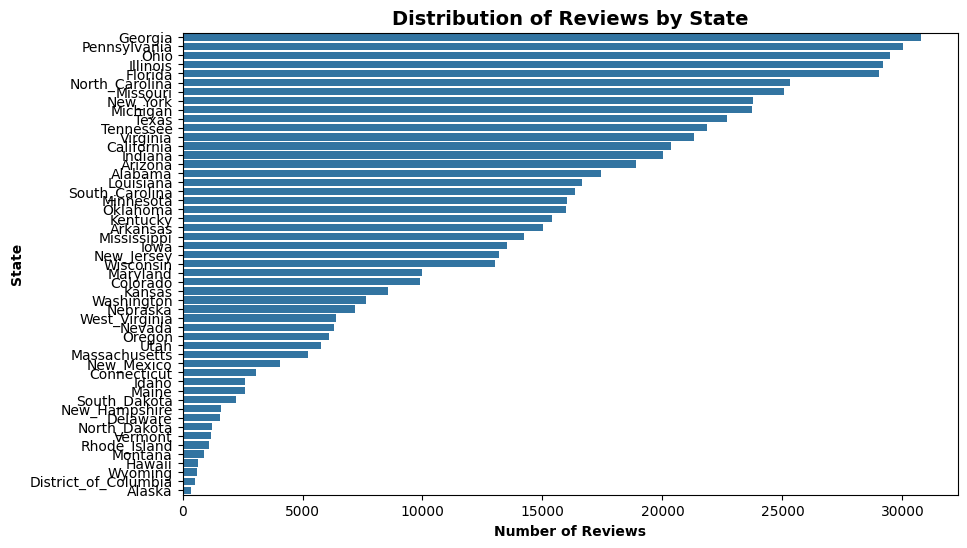

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of reviews for each state

state_review_counts = df_Google_reviews_CS["State_review"].value_counts()


# Plot the distribution of reviews by State in descending order

plt.figure(figsize=(10, 6))

sns.countplot(
    y="State_review", data=df_Google_reviews_CS, order=state_review_counts.index
)

plt.title("Distribution of Reviews by State", fontsize=14, weight="bold")

plt.xlabel("Number of Reviews", weight="bold")

plt.ylabel("State", weight="bold")
plt.show()

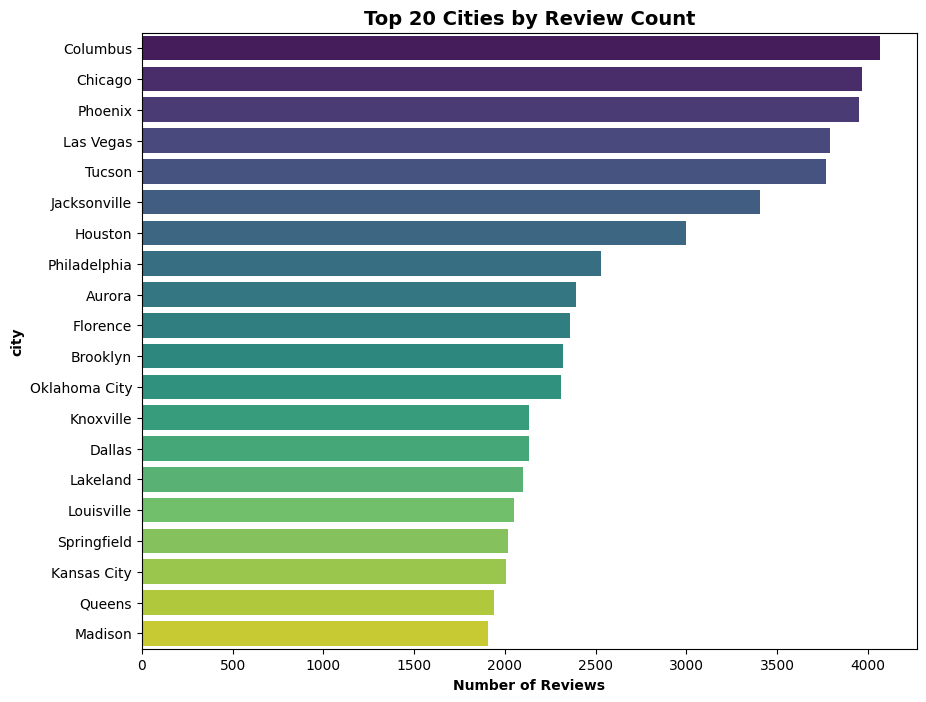

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Get the top 20 cities by review count
top_20_cities = df_Google_reviews_CS["city"].value_counts().head(20)

# Plot the distribution of reviews for the top 20 cities
plt.figure(figsize=(10, 8))
sns.barplot(
    x=top_20_cities.values,
    y=top_20_cities.index,
    hue=top_20_cities.index,
    palette="viridis",
    legend=False,
)
plt.title("Top 20 Cities by Review Count", fontsize=14, weight="bold")
plt.xlabel("Number of Reviews", weight="bold")
plt.ylabel("city", weight="bold")
plt.show()